Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
pd.set_option('display.max_columns', 50)

In [52]:
mypath = "..\src\Datalogs"
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
files

['CapitalFirmAgentDataInit.csv',
 'ConsumerFirmAgentDataInit.csv',
 'HouseholdDataInit.csv']

Read files

In [53]:
household_file = os.path.join(mypath, files[2])
cons_firm_file = os.path.join(mypath, files[1])
cap_firm_file = os.path.join(mypath, files[0])

df_h = pd.read_csv(household_file)
df_cons =  pd.read_csv(cons_firm_file)
df_cap = pd.read_csv(cap_firm_file)

### QQ Plot function to check for normality

In [54]:
def plot_qq(df,col_name):
    plt.figure(figsize=(4,3))
    stats.probplot(df[col_name], dist="norm", plot=plt)
    plt.title(col_name + " Normal Distribution QQ plot")
    plt.show()
    
def plot_hist(df,col_name):
    plt.figure(figsize=(4,3))
    stats.probplot(df[col_name], dist="norm", plot=plt)
    plt.title(col_name + " Normal Distribution QQ plot")
    plt.show()

In [55]:
def plot_qq_and_hist(df,col):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    #bin_size = int(np.ceil(np.sqrt(len(data))))
    plt.hist(df[col], bins = 'auto')
    plt.title('Histogram of {}'.format(col))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col + " Normal Distribution QQ plot")
    plt.show()

## Household data

In [56]:
df_h.head()

,wealth_human,expenditure_consumption,expenditure_tax,consumption_propensity,new_savings,cash_on_hand_real_desired,cash_on_hand_desired,cash_on_hand_current,saving_propensity,saving_propensity_optimist,saving_propensity_pessimist,income_current,income_average,income_wage,income_unemployment_benefit,income_gov_transfers,income_firm_owner_dividend,unemployed,reservation_wage,unemp_duration,unemp_duration_upper_bound,positive_sentiment,business_owner,c_f,c_h,c_excess_money,p_majority_op_adoption
0,9222,0,0,0.461136,0,0,0,0,0.187045,0.187045,0.287045,0,0,0,0,0,0,0,0,0,9,1,0,0.474091,0.187045,0.287045,0.198181
1,14804,0,0,0.740239,0,0,0,0,0.280080,0.280080,0.380080,0,0,0,0,0,0,0,0,0,13,1,0,0.660159,0.280080,0.380080,0.570318
2,5503,0,0,0.275156,0,0,0,0,0.125052,0.125052,0.225052,0,0,0,0,0,0,0,0,0,7,1,0,0.350104,0.125052,0.225052,0.284954
3,10524,0,0,0.526215,0,0,0,0,0.208738,0.208738,0.308738,0,0,0,0,0,0,0,0,0,10,1,0,0.517477,0.208738,0.308738,0.273853
4,10357,0,0,0.517890,0,0,0,0,0.205963,0.205963,0.305963,0,0,0,0,0,0,0,0,0,10,1,0,0.511926,0.205963,0.305963,0.189595


Get all columns that should be normally distributed (i.e. not all zeros)

In [57]:
df_h_norm = df_h.loc[:,((df_h.sum(axis=0) != 0)&(df_h.mean(axis=0) != 1))]
df_h_norm.head()

,wealth_human,consumption_propensity,saving_propensity,saving_propensity_optimist,saving_propensity_pessimist,unemp_duration_upper_bound,c_f,c_h,c_excess_money,p_majority_op_adoption
0,9222,0.461136,0.187045,0.187045,0.287045,9,0.474091,0.187045,0.287045,0.198181
1,14804,0.740239,0.280080,0.280080,0.380080,13,0.660159,0.280080,0.380080,0.570318
2,5503,0.275156,0.125052,0.125052,0.225052,7,0.350104,0.125052,0.225052,0.284954
3,10524,0.526215,0.208738,0.208738,0.308738,10,0.517477,0.208738,0.308738,0.273853
4,10357,0.517890,0.205963,0.205963,0.305963,10,0.511926,0.205963,0.305963,0.189595


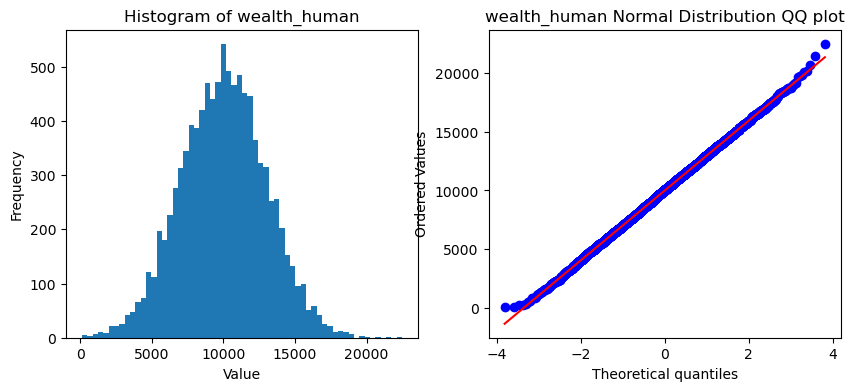

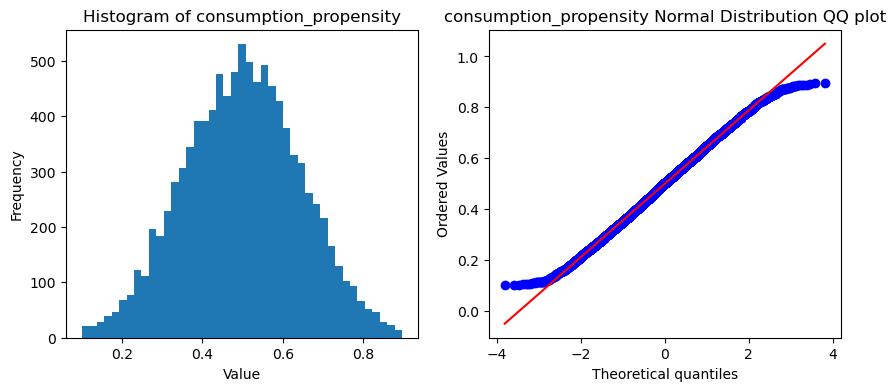

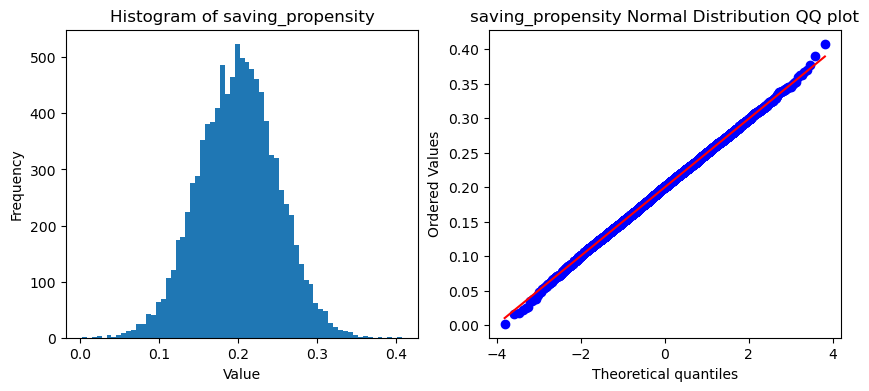

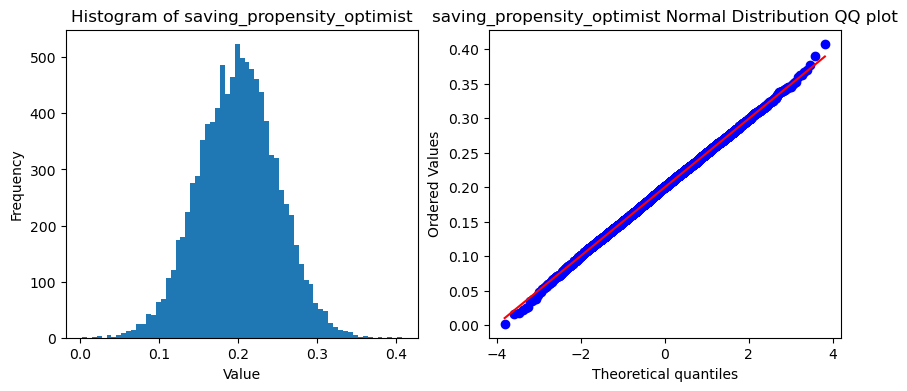

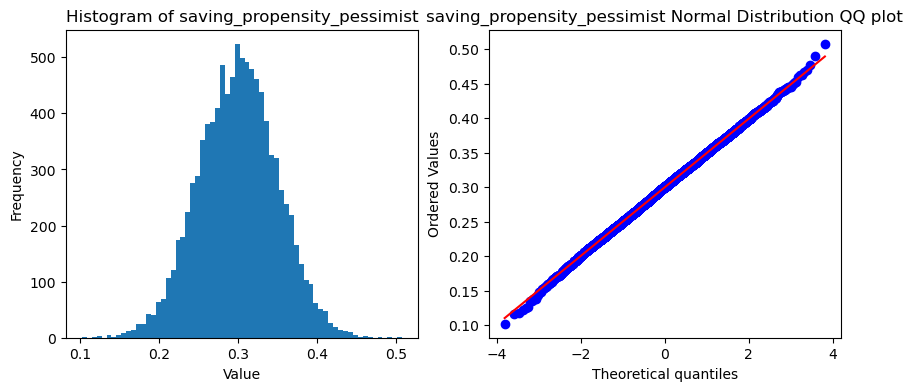

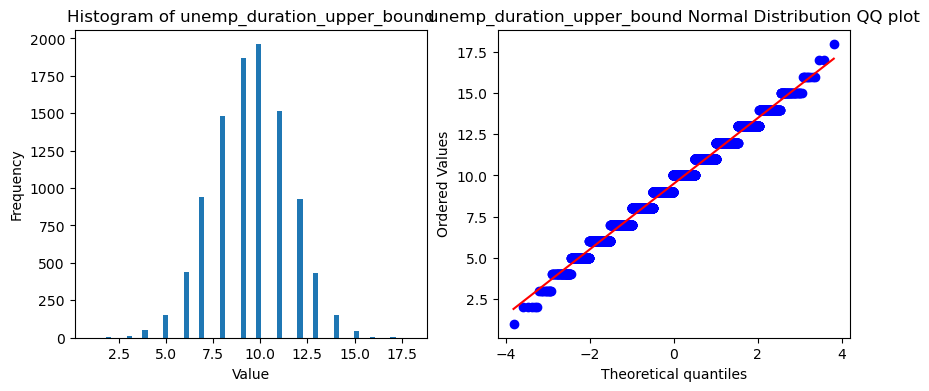

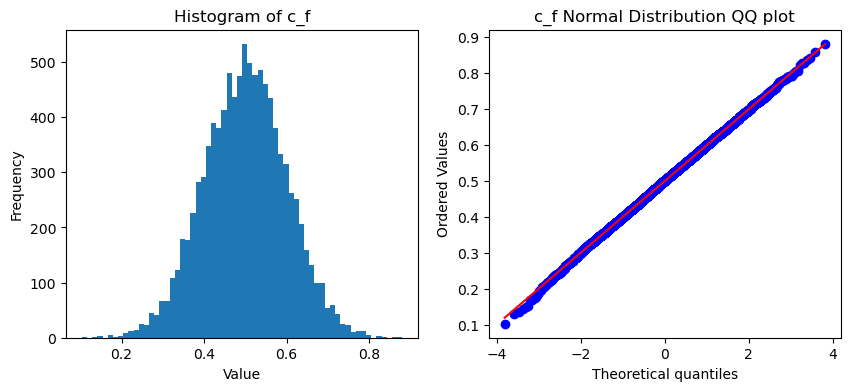

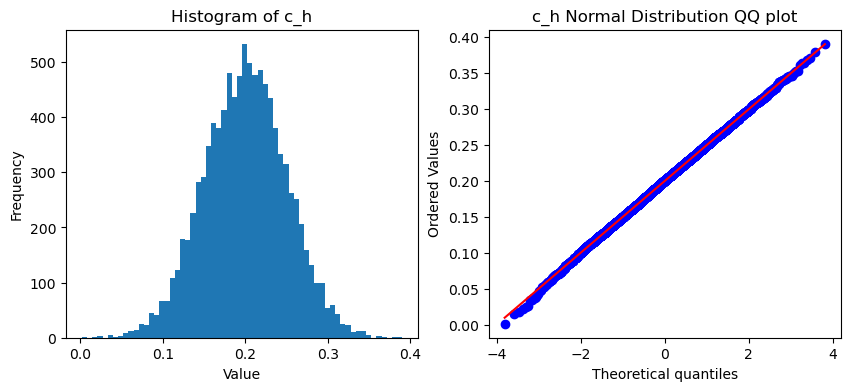

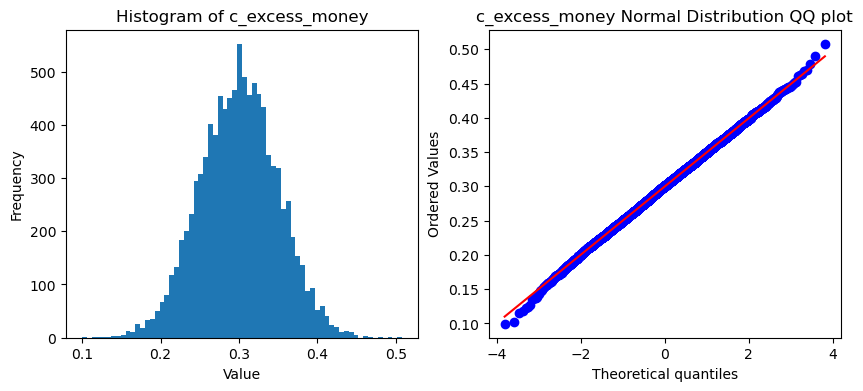

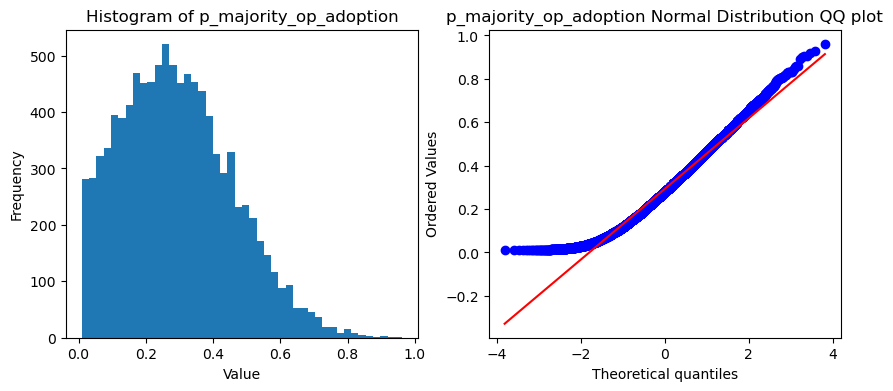

In [58]:
for col_name in df_h_norm.columns:
     plot_qq_and_hist(df_h_norm,col_name)

### Consumer Firm Data

In [59]:
df_cons.head()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm
0,0.0,974.0,0.0,0.0,0.0,0.0,0.0,0.0,9.48181,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,935226.0,0.0,935226.0,4.481810e-02,4.481810e-02,2.481810e-02,0.000000e+00,1.000000e+03,4.800000e+01,0.000000e+00,1,0.0,0.0,974.0,48.0,1.435230e+00,0.000000e+00,1,0,1
1,17308500.0,0.0,1160.0,0.0,0.0,0.0,0.0,0.0,0.00000,13.2032,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1400400.0,0.0,1.962380e-39,8.203180e-02,8.203180e-02,1.031670e+09,0.000000e+00,2.000000e+03,5.800000e+01,0,1.0,0.0,0.0,1160.0,8.127530e-44,1.900400e+00,0,0,0
2,17308700.0,17308800.0,0.0,850.0,0.0,0.0,0.0,0.0,0.00000,0.0000,1.088430e+09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,625259.0,0.000000e+00,8.761740e-40,2.002080e-02,1.017380e+09,1.024010e+09,0.000000e+00,3.000000e+03,42,0.0,1.0,0.0,0.0,1.191100e-42,5.885450e-44,131,8,144
3,19699100.0,19699300.0,19699400.0,0.0,1017.0,0.0,0.0,0.0,0.00000,0.0000,0.000000e+00,1.092980e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.462520e-39,0.000000e+00,1.462520e-39,1.029380e+09,1.029380e+09,1.023710e+09,0.000000e+00,160,50.0,0.0,1.0,0.0,0.000000e+00,1.425120e-42,50,0,0
4,0.0,19704800.0,19705000.0,19705000.0,0.0,1011.0,0.0,0.0,0.00000,0.0000,0.000000e+00,0.000000e+00,1.092870e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.443080e-39,0.000000e+00,1.029820e+06,1.029080e+09,1.029080e+09,1.019500e+09,0,5000.0,50.0,0.0,1.0,0.000000e+00,0.000000e+00,243,3,0


In [60]:
df_cons.describe()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,9.930000e+02,9.930000e+02,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,9.930000e+02,9.930000e+02,9.930000e+02,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,9.930000e+02,9.930000e+02,1000.000000,1000.000000,1000.000000
mean,4.296231e+08,4.295871e+08,4.296552e+08,4.296040e+08,4.295655e+08,4.295897e+08,4.296071e+08,4.296420e+08,7.595552e+31,7.595552e+31,4.307639e+08,4.307175e+08,4.297094e+08,4.286273e+08,4.276346e+08,4.276166e+08,4.276051e+08,4.276443e+08,4.276325e+08,4.276470e+08,7.595552e+31,7.595552e+31,7.595552e+31,4.306943e+08,4.296845e+08,4.296230e+08,4.296337e+08,68.967000,4.296635e+08,4.288405e+08,4.288772e+08,4.288643e+08,7.595552e+31,7.595552e+31,69.450000,85.953000,57.635000
std,6.382634e+08,6.382294e+08,6.382878e+08,6.382436e+08,6.382033e+08,6.382298e+08,6.382440e+08,6.382766e+08,4.449301e+32,4.449301e+32,6.385052e+08,6.384614e+08,6.383442e+08,6.381553e+08,6.380518e+08,6.380339e+08,6.380260e+08,6.380603e+08,6.380480e+08,6.380611e+08,4.449301e+32,4.449301e+32,4.449301e+32,6.384369e+08,6.383187e+08,6.382623e+08,6.382722e+08,85.754415,6.383371e+08,6.383356e+08,6.383773e+08,6.383582e+08,4.449301e+32,4.449301e+32,86.412051,94.983275,72.215406
min,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-7.781730e-01,-7.781730e-01,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-7.781730e-01,-7.781730e-01,-7.781730e-01,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,0.000000,-1.097030e+09,-1.097030e+09,-1.097030e+09,-1.097030e+09,-7.781730e-01,-7.781730e-01,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,1.019370e-38,1.019370e-38,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,1.019330e-38,1.019330e-38,1.019370e-38,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,12.000000,7.274180e+06,7.274180e+06,7.274180e+06,7.274180e+06,1.019330e-38,1.019330e-38,11.500000,30.000000,19.000000
75%,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,2.614860e-01,2.614860e-01,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,2.614860e-01,2.614860e-01,2.614860e-01,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,144.000000,1.048960e+09,1.048960e+09,1.048960e+09,1.048960e+09,2.614860e-01,2.614860e-01,144.000000,196.000000,110.000000
max,1.999760e+09,1.999760e+09,1.999760e+09,1.99

- Values not properly initialized

Select normally distributed columns

In [61]:
df_cons_norm = df_cons.loc[:,((df_cons.mean(axis=0) < 999999)&(df_cons.sum(axis=0) !=0))]
print(len(df_cons_norm.columns), " columns")
df_cons_norm.head()

4  columns


,need_worker,sentiment,bankrupt,is_cons_firm
0,1,1,0,1
1,0,0,0,0
2,42,131,8,144
3,160,50,0,0
4,0,243,3,0


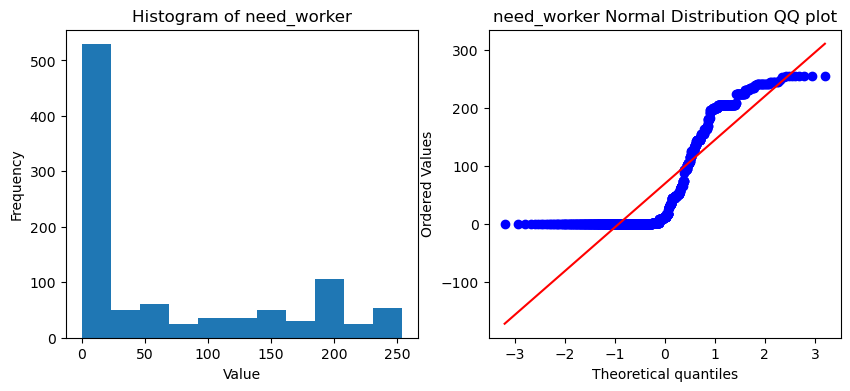

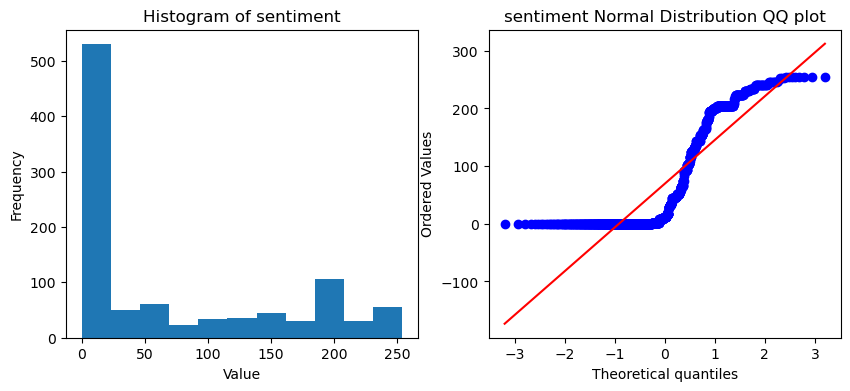

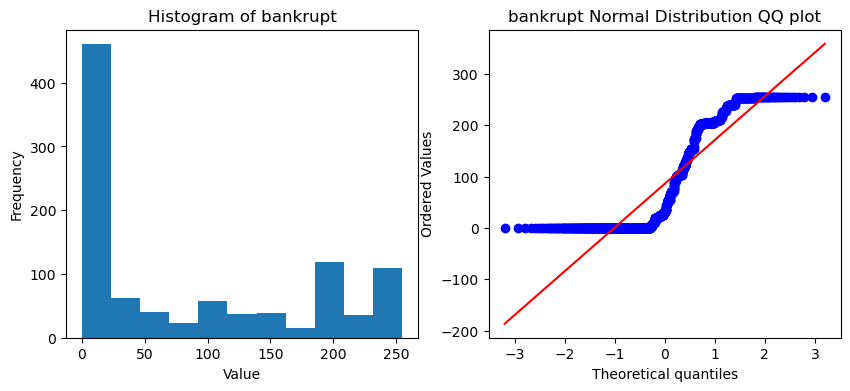

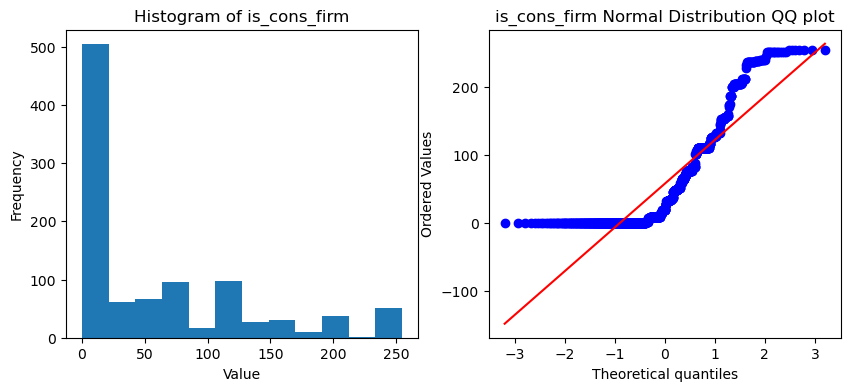

In [62]:
for col_name in df_cons_norm.columns:
     plot_qq_and_hist(df_cons_norm,col_name)

### Capital Firm Data

In [63]:
df_cap.head()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm
0,0,974,0,0,0,0,0,0,9.48181,0,0,0,0,0,0,0,0,935226.0,0,935226.0,0.044818,0.044818,0.024818,0,1000.0,48,0,1,0,0,974,48,1.43523,0,1,0,0
1,0,1160,0,0,0,0,0,0,13.20320,0,0,0,0,0,0,0,0,1400400.0,0,1400400.0,0.082032,0.082032,0.062032,0,2000.0,58,0,1,0,0,1160,58,1.90040,0,1,0,0
2,0,850,0,0,0,0,0,0,7.00208,0,0,0,0,0,0,0,0,625259.0,0,625259.0,0.020021,0.020021,0.033495,0,3000.0,42,0,1,0,0,850,42,1.12526,0,1,0,0
3,0,1017,0,0,0,0,0,0,10.34950,0,0,0,0,0,0,0,0,1043690.0,0,1043690.0,0.053495,0.053495,0.032385,0,4000.0,50,0,1,0,0,1017,50,1.54369,0,1,0,0
4,0,1011,0,0,0,0,0,0,10.23850,0,0,0,0,0,0,0,0,1029820.0,0,1029820.0,0.052385,0.052385,0.023960,0,5000.0,50,0,1,0,0,1011,50,1.52982,0,1,0,0


In [64]:
df_cap.describe()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm
count,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1.000000e+03,1000.0,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0
mean,0.0,1002.620000,0.0,0.0,0.0,0.0,0.0,0.0,10.062055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.007756e+06,0.0,1.007756e+06,0.051529,0.051529,0.034154,4.99600,500500.000000,49.648000,0.0,1.0,0.0,0.0,1002.620000,49.648000,1.507757,0.0,1.0,0.0,0.0
std,0.0,102.883179,0.0,0.0,0.0,0.0,0.0,0.0,2.057481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.571850e+05,0.0,2.571850e+05,0.019477,0.019477,0.017888,14.99723,288819.436096,5.131513,0.0,0.0,0.0,0.0,102.883179,5.131513,0.257185,0.0,0.0,0.0,0.0
min,0.0,630.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.617910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.723900e+04,0.0,7.723900e+04,0.005428,0.005428,0.001249,0.00000,1000.000000,31.000000,0.0,1.0,0.0,0.0,630.000000,31.000000,0.577239,0.0,1.0,0.0,0.0
25%,0.0,935.000000,0.0,0.0,0.0,0.0,0.0,0.0,8.701142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.376418e+05,0.0,8.376418e+05,0.037880,0.037880,0.020471,0.00000,250750.000000,46.000000,0.0,1.0,0.0,0.0,935.000000,46.000000,1.337645,0.0,1.0,0.0,0.0
50%,0.0,1001.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.031450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.003930e+06,0.0,1.003930e+06,0.050737,0.050737,0.032727,0.00000,500500.000000,50.000000,0.0,1.0,0.0,0.0,1001.000000,50.000000,1.503930,0.0,1.0,0.0,0.0
75%,0.0,1076.250000,0.0,0.0,0.0,0.0,0.0,0.0,11.537775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.192218e+06,0.0,1.192218e+06,0.065938,0.065938,0.047027,0.00000,750250.000000,53.000000,0.0,1.0,0.0,0.0,1076.250000,53.000000,1.692217,0.0,1.0,0.0,0.0
max,0.0,1326.000000,0.0,0.0,0.0,0.0,0.0,0.0,16.534800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.816840e+06,0.0,1.816840e+06,0.115348,0.115348,0.095348,61.00000,1000000.000000,66.000000,0.0,1.0,0.0,0.0,1326.000000,66.000000,2.316840,0.0,1.0,0.0,0.0


- **Some values which should have been set to zero take random large values, check this!**

In [65]:
df_cap_norm = df_cap.loc[:,((df_cap.sum(axis=0) !=0)& (df_cap.mean(axis=0) != 1))]
print(len(df_cap_norm.columns), " columns")
df_cap_norm.head()

13  columns


,production_planned,good_price_current,total_assets,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,inventory,working_capital_inventory,desired_inventory_factor
0,974,9.48181,935226.0,935226.0,0.044818,0.044818,0.024818,0,1000.0,48,974,48,1.43523
1,1160,13.20320,1400400.0,1400400.0,0.082032,0.082032,0.062032,0,2000.0,58,1160,58,1.90040
2,850,7.00208,625259.0,625259.0,0.020021,0.020021,0.033495,0,3000.0,42,850,42,1.12526
3,1017,10.34950,1043690.0,1043690.0,0.053495,0.053495,0.032385,0,4000.0,50,1017,50,1.54369
4,1011,10.23850,1029820.0,1029820.0,0.052385,0.052385,0.023960,0,5000.0,50,1011,50,1.52982


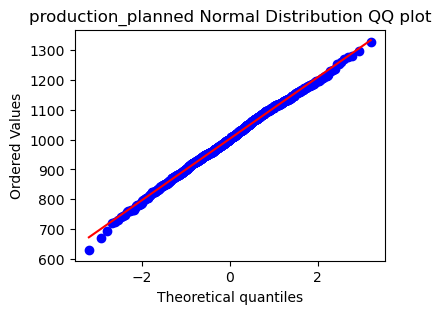

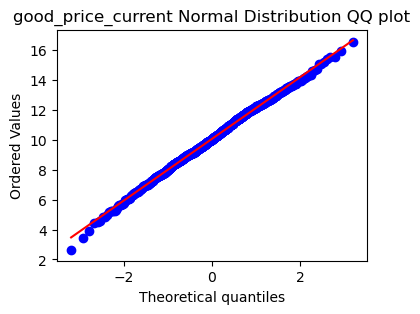

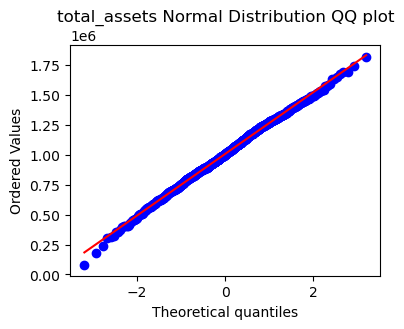

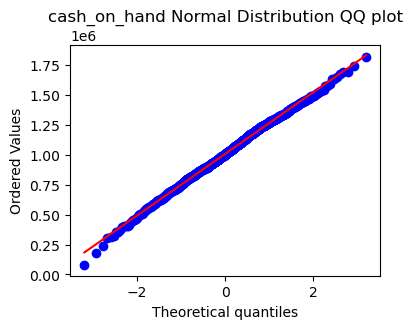

In [ ]:
for col_name in df_cap_norm.columns:
    plot_qq(df_cap_norm,col_name)

In [ ]:
for col_name in df_cap_norm.columns:
    plot_qq_and_hist(df_cap_norm,col_name)